In [326]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.float_format","{:.5f}".format)

In [327]:
df=pd.read_csv("expenses.csv")
#https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [328]:
df.columns,df.shape

(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'),
 (1338, 7))

In [329]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No NA's in the dataset. The target variables is expenses

In [330]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90000,0,yes,southwest,16884.92400
1,18,male,33.77000,1,no,southeast,1725.55230
2,28,male,33.00000,3,no,southeast,4449.46200
3,33,male,22.70500,0,no,northwest,21984.47061
4,32,male,28.88000,0,no,northwest,3866.85520


In [331]:
import seaborn as sns

<Axes: xlabel='bmi', ylabel='charges'>

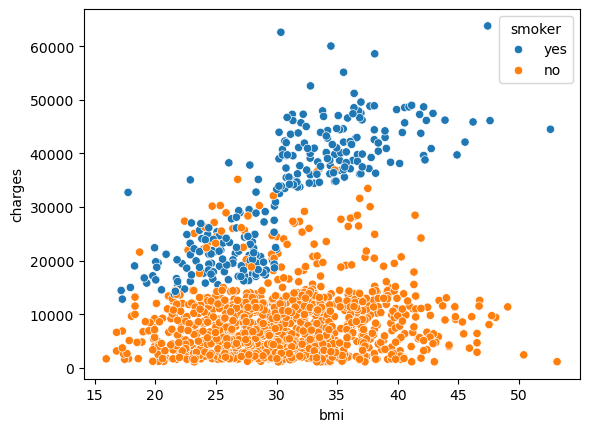

In [332]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)

Note that bmi and charges seem to be positively correlated for smokers. This could be interpeted as a hint for the inclusion of a interaction term in our regression

<Axes: xlabel='region', ylabel='charges'>

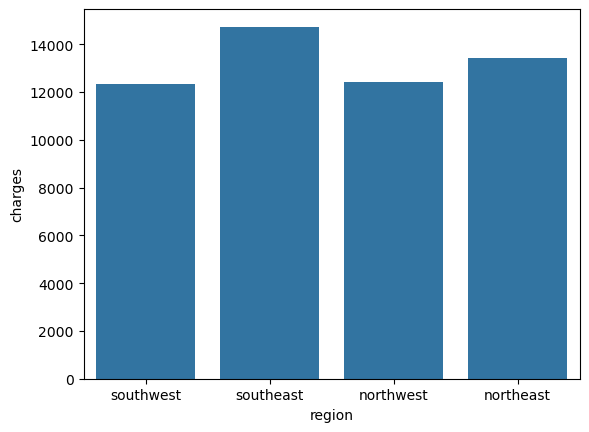

In [333]:
sns.barplot(x="region",y="charges",data=df,ci=None)

Most charges come from the southeast region

In [334]:
df["is_smoker"]=df["smoker"].apply(lambda x:1 if x=="yes:" else 0)

In [335]:
pivot_table=pd.pivot_table(index=["sex","region","smoker"],values="charges",data=df,aggfunc="mean")

In [336]:
pivot_table 

charges
sex    region    smoker            
female northeast no      9640.42698
                 yes    28032.04640
       northwest no      8786.99868
                 yes    29670.82495
       southeast no      8440.20555
                 yes    33034.82072
       southwest no      8234.09126
                 yes    31687.98843
male   northeast no      8664.04222
                 yes    30926.25258
       northwest no      8320.68932
                 yes    30713.18142
       southeast no      7609.00359
                 yes    36029.83937
       southwest no      7778.90553
                 yes    32598.86285

all possilbe combinations point to the fact that smokers have a higher charge

<Axes: xlabel='region', ylabel='charges'>

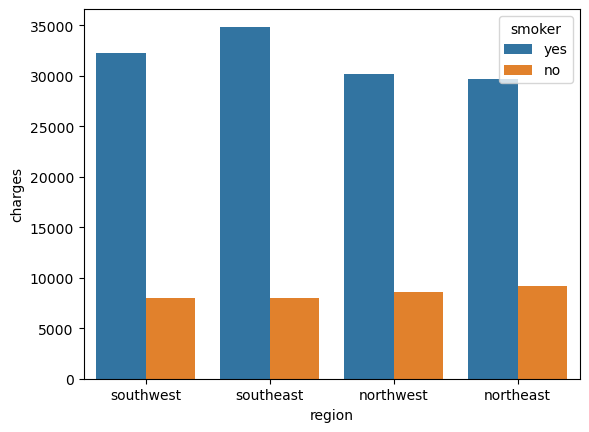

In [337]:
sns.barplot(x="region",y="charges",hue="smoker",ci=None,data=df)

<Axes: xlabel='region', ylabel='charges'>

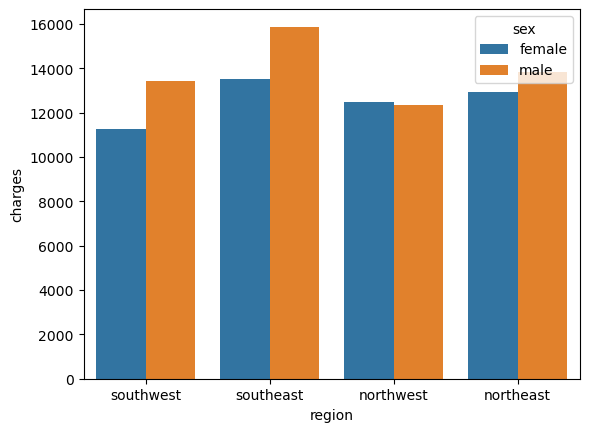

In [338]:
sns.barplot(x="region",y="charges",hue="sex",ci=None,data=df)

Furhtermore in most regions the overall charges paid by women are higher

# Linear regression analysis

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [340]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [341]:
# we will turn the variable children into a categorical variable
def household_size(x):
    if x==0:
        return "single"
    elif x==1 | x==2:
        return "medium"
    else:
        return "large"

df["household_size"]=df["children"].apply(household_size)


In [342]:
X=df.drop(["charges","children","is_smoker"],axis=1)

In [343]:
y=df["charges"]

In [344]:
X_dummies=df[["sex","smoker","region","household_size"]]


In [345]:
X_numerical=df[["age","bmi"]]
X_numerical.head()

,age,bmi
0,19,27.90000
1,18,33.77000
2,28,33.00000
3,33,22.70500
4,32,28.88000


In [346]:
X_dummies=pd.get_dummies(X_dummies,drop_first=False)
X_dummies=X_dummies.astype(int)
X_dummies.head()
X=pd.concat([X_numerical,X_dummies],axis=1)

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [348]:
import matplotlib.pyplot as plt
def res_plot(y_test,y_pred):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.xlabel("Actual Charges")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

In [349]:
model=linear_regression=LinearRegression()

In [350]:
model.fit(X_train,y_train)

LinearRegression()

In [351]:
y_pred = model.predict(X_test)

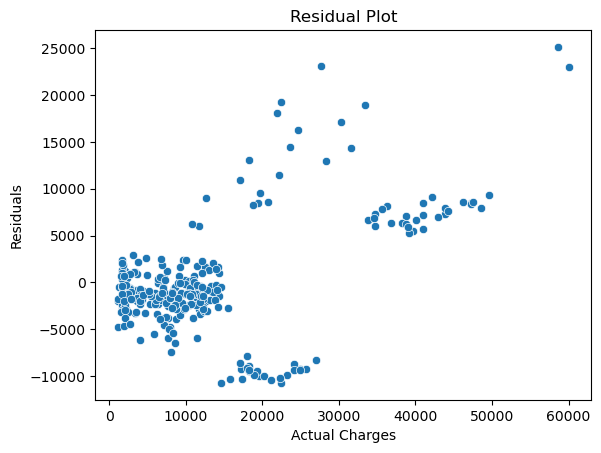

In [352]:
res_plot(y_test,y_pred)

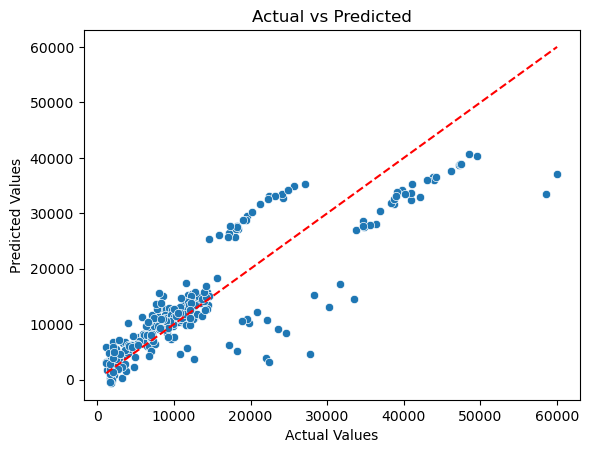

In [353]:


sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [354]:
#define a dataframe to save model metrics
model_metrics = pd.DataFrame(columns=["Model",  "MSE", "R2"])

In [355]:
new_row = {"Model": "Linear Regression", "MSE": mean_squared_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}
new_row = pd.DataFrame([new_row])
# Append the new row to the model_metrics DataFrame 
model_metrics = pd.concat([model_metrics,new_row], ignore_index=True)
model_metrics

,Model,MSE,R2
0,Linear Regression,35477993.36953,0.76234


In [356]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 35477993.3695
R² Score: 0.7623


 we will add  polynomial terms and an interaction terms

In [357]:
X["bmi_squared"] = X["bmi"] ** 2
X["age_squared"] = X["age"] ** 2
X["interaction_term"]=X["bmi"] * X["smoker_yes"]

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [359]:
model=linear_regression=LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [360]:
y_pred=model.predict(X_test)

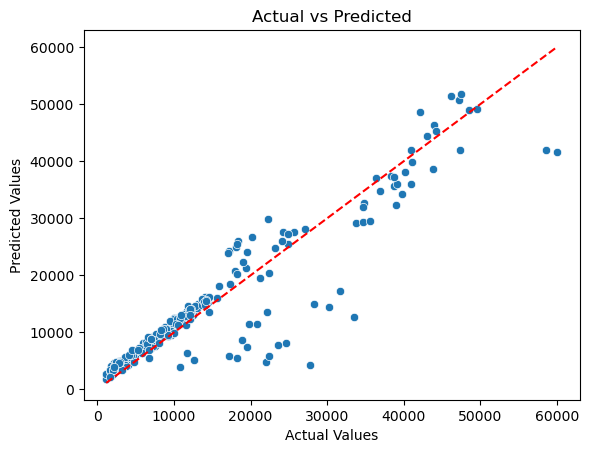

In [361]:
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [362]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
new_row = {"Model": "Linear Regression with polynomial \n and interaction term", "MSE": mean_squared_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}
new_row = pd.DataFrame([new_row])
# Append the new row to the model_metrics DataFrame 
model_metrics = pd.concat([model_metrics,new_row], ignore_index=True)


Mean Squared Error (MSE): 20589913.5650
R² Score: 0.8621


In [363]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     651.8
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:20:20   Log-Likelihood:                -13235.
No. Observations:                1338   AIC:                         2.649e+04
Df Residuals:                    1326   BIC:                         2.656e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5739.89

Age is statistically insignificant while region_northeast is marginally statistically significant (p-value 5.6%)

# Decision tree Regression

In [364]:
from sklearn.tree import DecisionTreeRegressor

In [365]:
#Train the Decision Tree Regressor

model=DecisionTreeRegressor(max_depth=3, random_state=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [366]:
#make predictions and test against the test set

y_pred= model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
model_metrics.loc[len(df)]={"Model":"Decision Tree Regressor",
                "MSE":mean_squared_error(y_test,y_pred),
                "R2":r2_score(y_test,y_pred)}

Mean Squared Error (MSE): 22868674.4303
R² Score: 0.8468


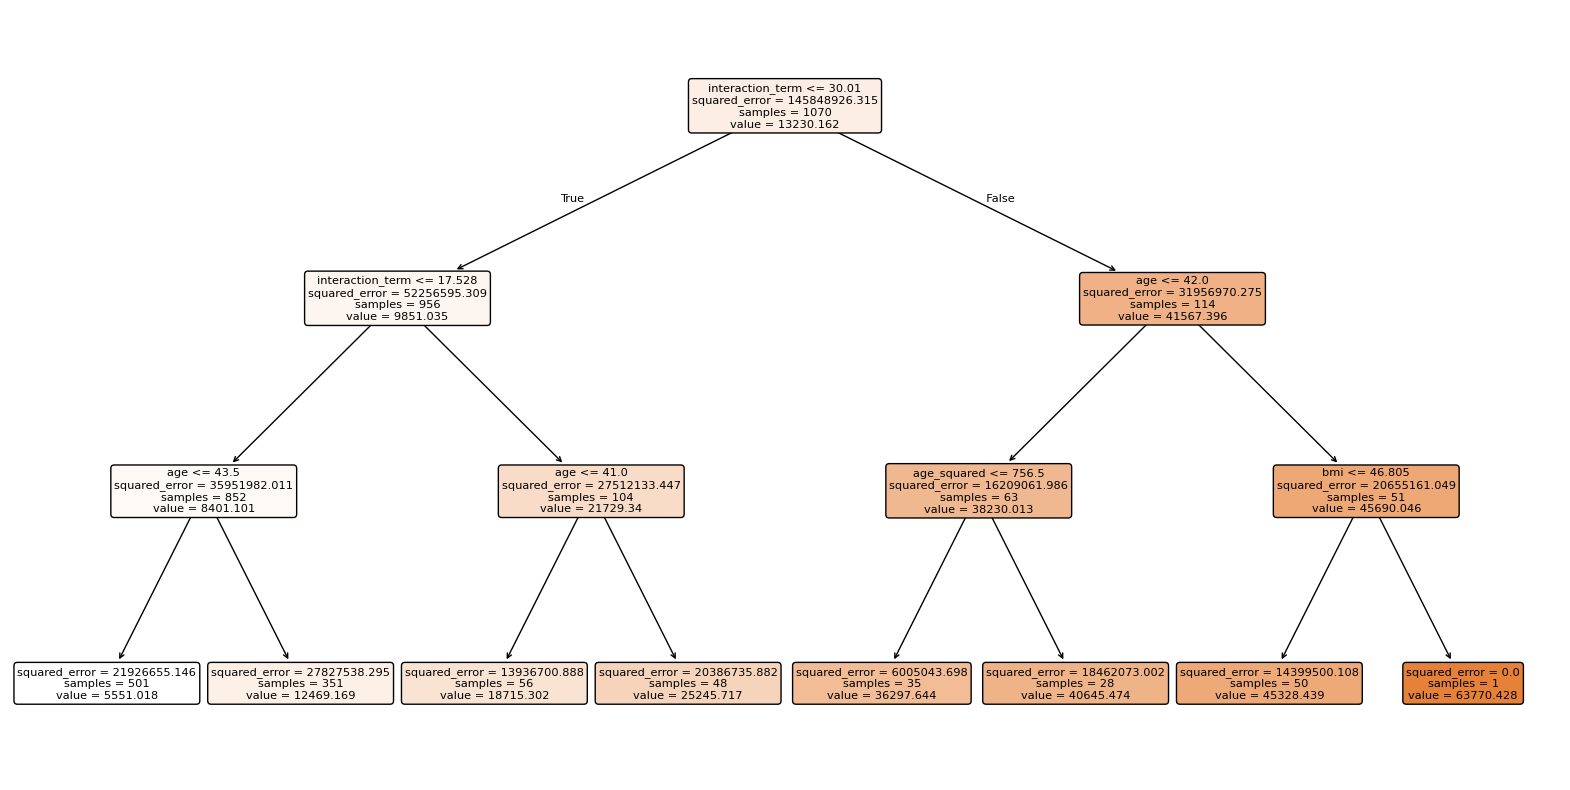

In [367]:
#visualize the decision tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Lasso regression

In [368]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [369]:
model=Lasso(alpha=0.1, random_state=1)
model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=1)

In [370]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
new_row = {"Model": "Lasso Regression", "MSE": mean_squared_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}
new_row = pd.DataFrame([new_row])
# Append the new row to the model_metrics DataFrame 
model_metrics = pd.concat([model_metrics,new_row], ignore_index=True)
model_metrics

Mean Squared Error (MSE): 22868674.43028774
R² Score: 0.8468074996864368


,Model,MSE,R2
0,Linear Regression,35477993.36953,0.76234
1,Linear Regression with polynomial \n and inter...,20589913.56505,0.86207
2,Decision Tree Regressor,22868674.43029,0.84681
3,Lasso Regression,22868674.43029,0.84681


# Lasso tuning

In [371]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=np.linspace(0.01, 10, 100), cv=5, random_state=1)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=5, random_state=1)

In [372]:
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
new_row = {"Model": "Lasso tuned Regression", "MSE": mean_squared_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}
new_row = pd.DataFrame([new_row])
# Append the new row to the model_metrics DataFrame 
model_metrics = pd.concat([model_metrics,new_row], ignore_index=True)
model_metrics

Mean Squared Error (MSE): 20590038.231588855
R² Score: 0.8620716103216102


,Model,MSE,R2
0,Linear Regression,35477993.36953,0.76234
1,Linear Regression with polynomial \n and inter...,20589913.56505,0.86207
2,Decision Tree Regressor,22868674.43029,0.84681
3,Lasso Regression,22868674.43029,0.84681
4,Lasso tuned Regression,20590038.23159,0.86207


In [373]:
model_metrics

,Model,MSE,R2
0,Linear Regression,35477993.36953,0.76234
1,Linear Regression with polynomial \n and inter...,20589913.56505,0.86207
2,Decision Tree Regressor,22868674.43029,0.84681
3,Lasso Regression,22868674.43029,0.84681
4,Lasso tuned Regression,20590038.23159,0.86207


 Overall the decision tree and lasso regression dont improve the predictive ability of linear regression with polynomial features and interaction terms